# Tabular Playground Series - Aug 2021

## 1. Download Datasets & Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.init as init
import torch.utils.data as Data
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

## 2. Exploratory Data Analysis (EDA)

In [3]:
# read csv files
train_df = pd.read_csv('../input/tabular-playground-series-aug-2021/train.csv', index_col='id')
test_df = pd.read_csv('../input/tabular-playground-series-aug-2021/test.csv', index_col='id')

print('Shape of Train data:', train_df.shape)
print('Shape of Test data:', test_df.shape)

Shape of Train data: (250000, 101)
Shape of Test data: (150000, 100)


In [4]:
train_df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [5]:
# check the null entities in train data
train_df.isnull().sum().sum()

0

### Target Distribution

In [6]:
# distribution of target variable(train_df['loss'])
train_df['loss'].value_counts()

0     60144
2     22225
1     22069
3     15902
4     13371
5     12458
6     10697
7      8894
8      8264
9      7435
10     7242
11     6572
12     5718
13     4828
14     4182
15     3671
16     3580
17     3420
18     3354
19     3079
20     2878
21     2478
22     2203
23     1875
24     1722
25     1457
26     1385
27     1284
28     1129
29     1096
30     1057
31      899
32      852
33      663
34      570
35      485
36      361
37      266
38      135
39       62
40       24
41       11
42        3
Name: loss, dtype: int64

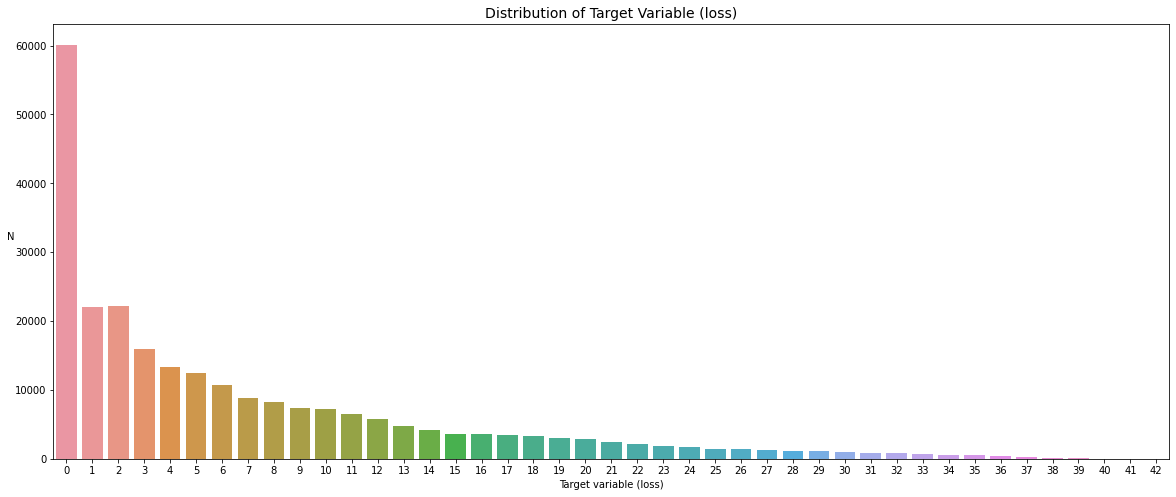

In [7]:
# visualization 
plt.figure(figsize=(20, 8))
sns.countplot(x='loss', data=train_df)
plt.title('Distribution of Target Variable (loss)', fontsize=14)
plt.xlabel('Target variable (loss)'); plt.ylabel('N', rotation=0)
plt.show()

### Description Table of Train data

In [8]:
train_df.describe().T.style.bar(subset=['mean', 'min', 'max'], color='#d65f5f')

,count,mean,std,min,25%,50%,75%,max
f0,250000.000000,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777323,1.072070
f1,250000.000000,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.000000
f2,250000.000000,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.768590
f3,250000.000000,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.680190
f4,250000.000000,3595.133426,6072.401061,-7589.280000,163.864750,943.000500,4115.355000,37847.500000
f5,250000.000000,8.205953,5.475723,-3.291050,4.110127,7.472445,11.030950,35.078000
f6,250000.000000,164.508753,183.335563,-40.967200,27.894900,91.005250,240.843750,947.143000
f7,250000.000000,0.375533,0.813597,-4.143080,-0.026245,0.619862,0.933855,4.010380
f8,250000.000000,16.669745,99.758709,-502.813000,-17.392025,8.714945,55.407625,465.956000
f9,250000.000000,1.190382,0.099700,0.934037,1.132640,1.170370,1.218880,1.712450


The values of the column 'f60' has a very wide distribution  
and other columns (like 'f16', 'f27', 'f52') has also a wide distribution

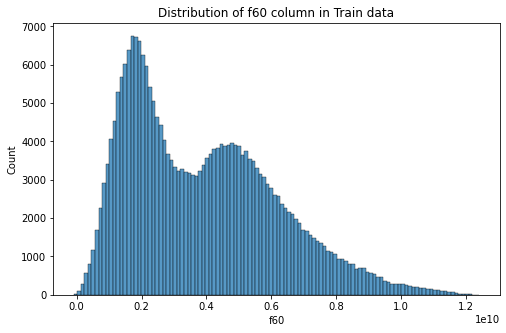

In [9]:
# f60 column
plt.figure(figsize=(8, 5))
sns.histplot(x='f60', data=train_df)
plt.title('Distribution of f60 column in Train data')
plt.show()

In [10]:
train_df.agg(func=['mean','median', 'min', 'max']).sort_values(by='mean', axis=1, ascending=False)

,f60,f16,f27,f52,f91,f75,f56,f22,f4,f55,...,f3,f18,f81,f71,f17,f32,f48,f76,f82,f24
mean,3.882984e+09,8.891112e+06,47223.903504,18152.791289,4856.812768,4430.718917,4302.990496,3622.094586,3595.133426,1003.602256,...,0.050010,0.041674,0.014504,0.012219,0.009645,-0.018490,-0.095555,-0.159048,-0.455453,-0.480271
median,3.547500e+09,6.463494e+06,74846.000000,2124.345000,1060.025000,966.689000,967.489500,907.796000,943.000500,888.000000,...,0.004099,0.167400,0.007968,0.007164,0.001599,-0.003925,-0.172985,-0.087620,-0.458585,-0.762852
min,-9.358330e+07,-1.173084e+06,-3391.000000,-62842.800000,-12695.700000,-11332.100000,-10705.100000,-10875.700000,-7589.280000,-311.000000,...,-1.475560,-2.777610,-0.122903,-0.294238,-0.341300,-1.824650,-1.911800,-2.753550,-0.994638,-1.771980
max,1.241700e+10,3.346016e+07,92186.000000,200631.000000,54334.600000,48334.400000,48997.200000,45432.600000,37847.500000,5296.000000,...,1.680190,3.242530,0.249145,0.441102,0.494495,1.691910,1.907940,2.854910,0.100138,1.795590


### Correlation with Target Variable

Text(0.5, 1.0, 'Features correlation to target label')

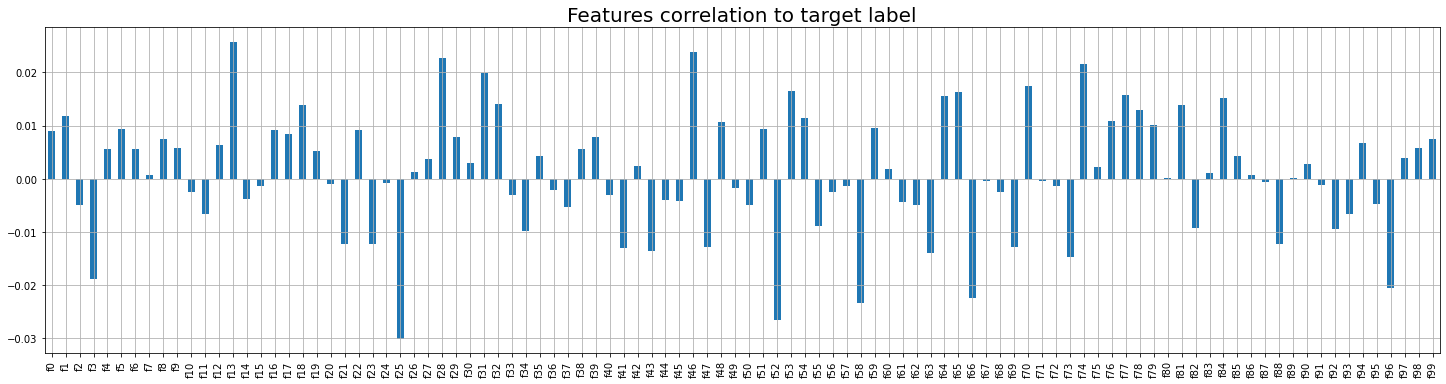

In [11]:
corr_mat = train_df.corr()

plt.figure(figsize=(25, 6))
corr_mat["loss"][:-1].plot(kind="bar", grid=True)
plt.title("Features correlation to target label", fontdict={"fontsize": 20})

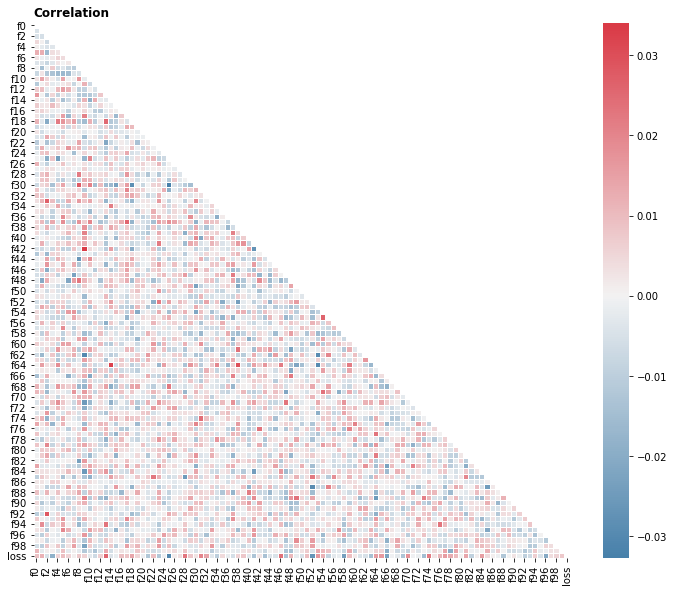

In [12]:
# correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(12 , 12))

mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_mat, ax=ax,
        square=True, center=0, linewidth=1,
        cmap=sns.diverging_palette(240, 10, as_cmap=True),
        cbar_kws={"shrink": .82},    
        mask=mask
       ) 

ax.set_title(f'Correlation', loc='left', fontweight='bold')     

plt.show()

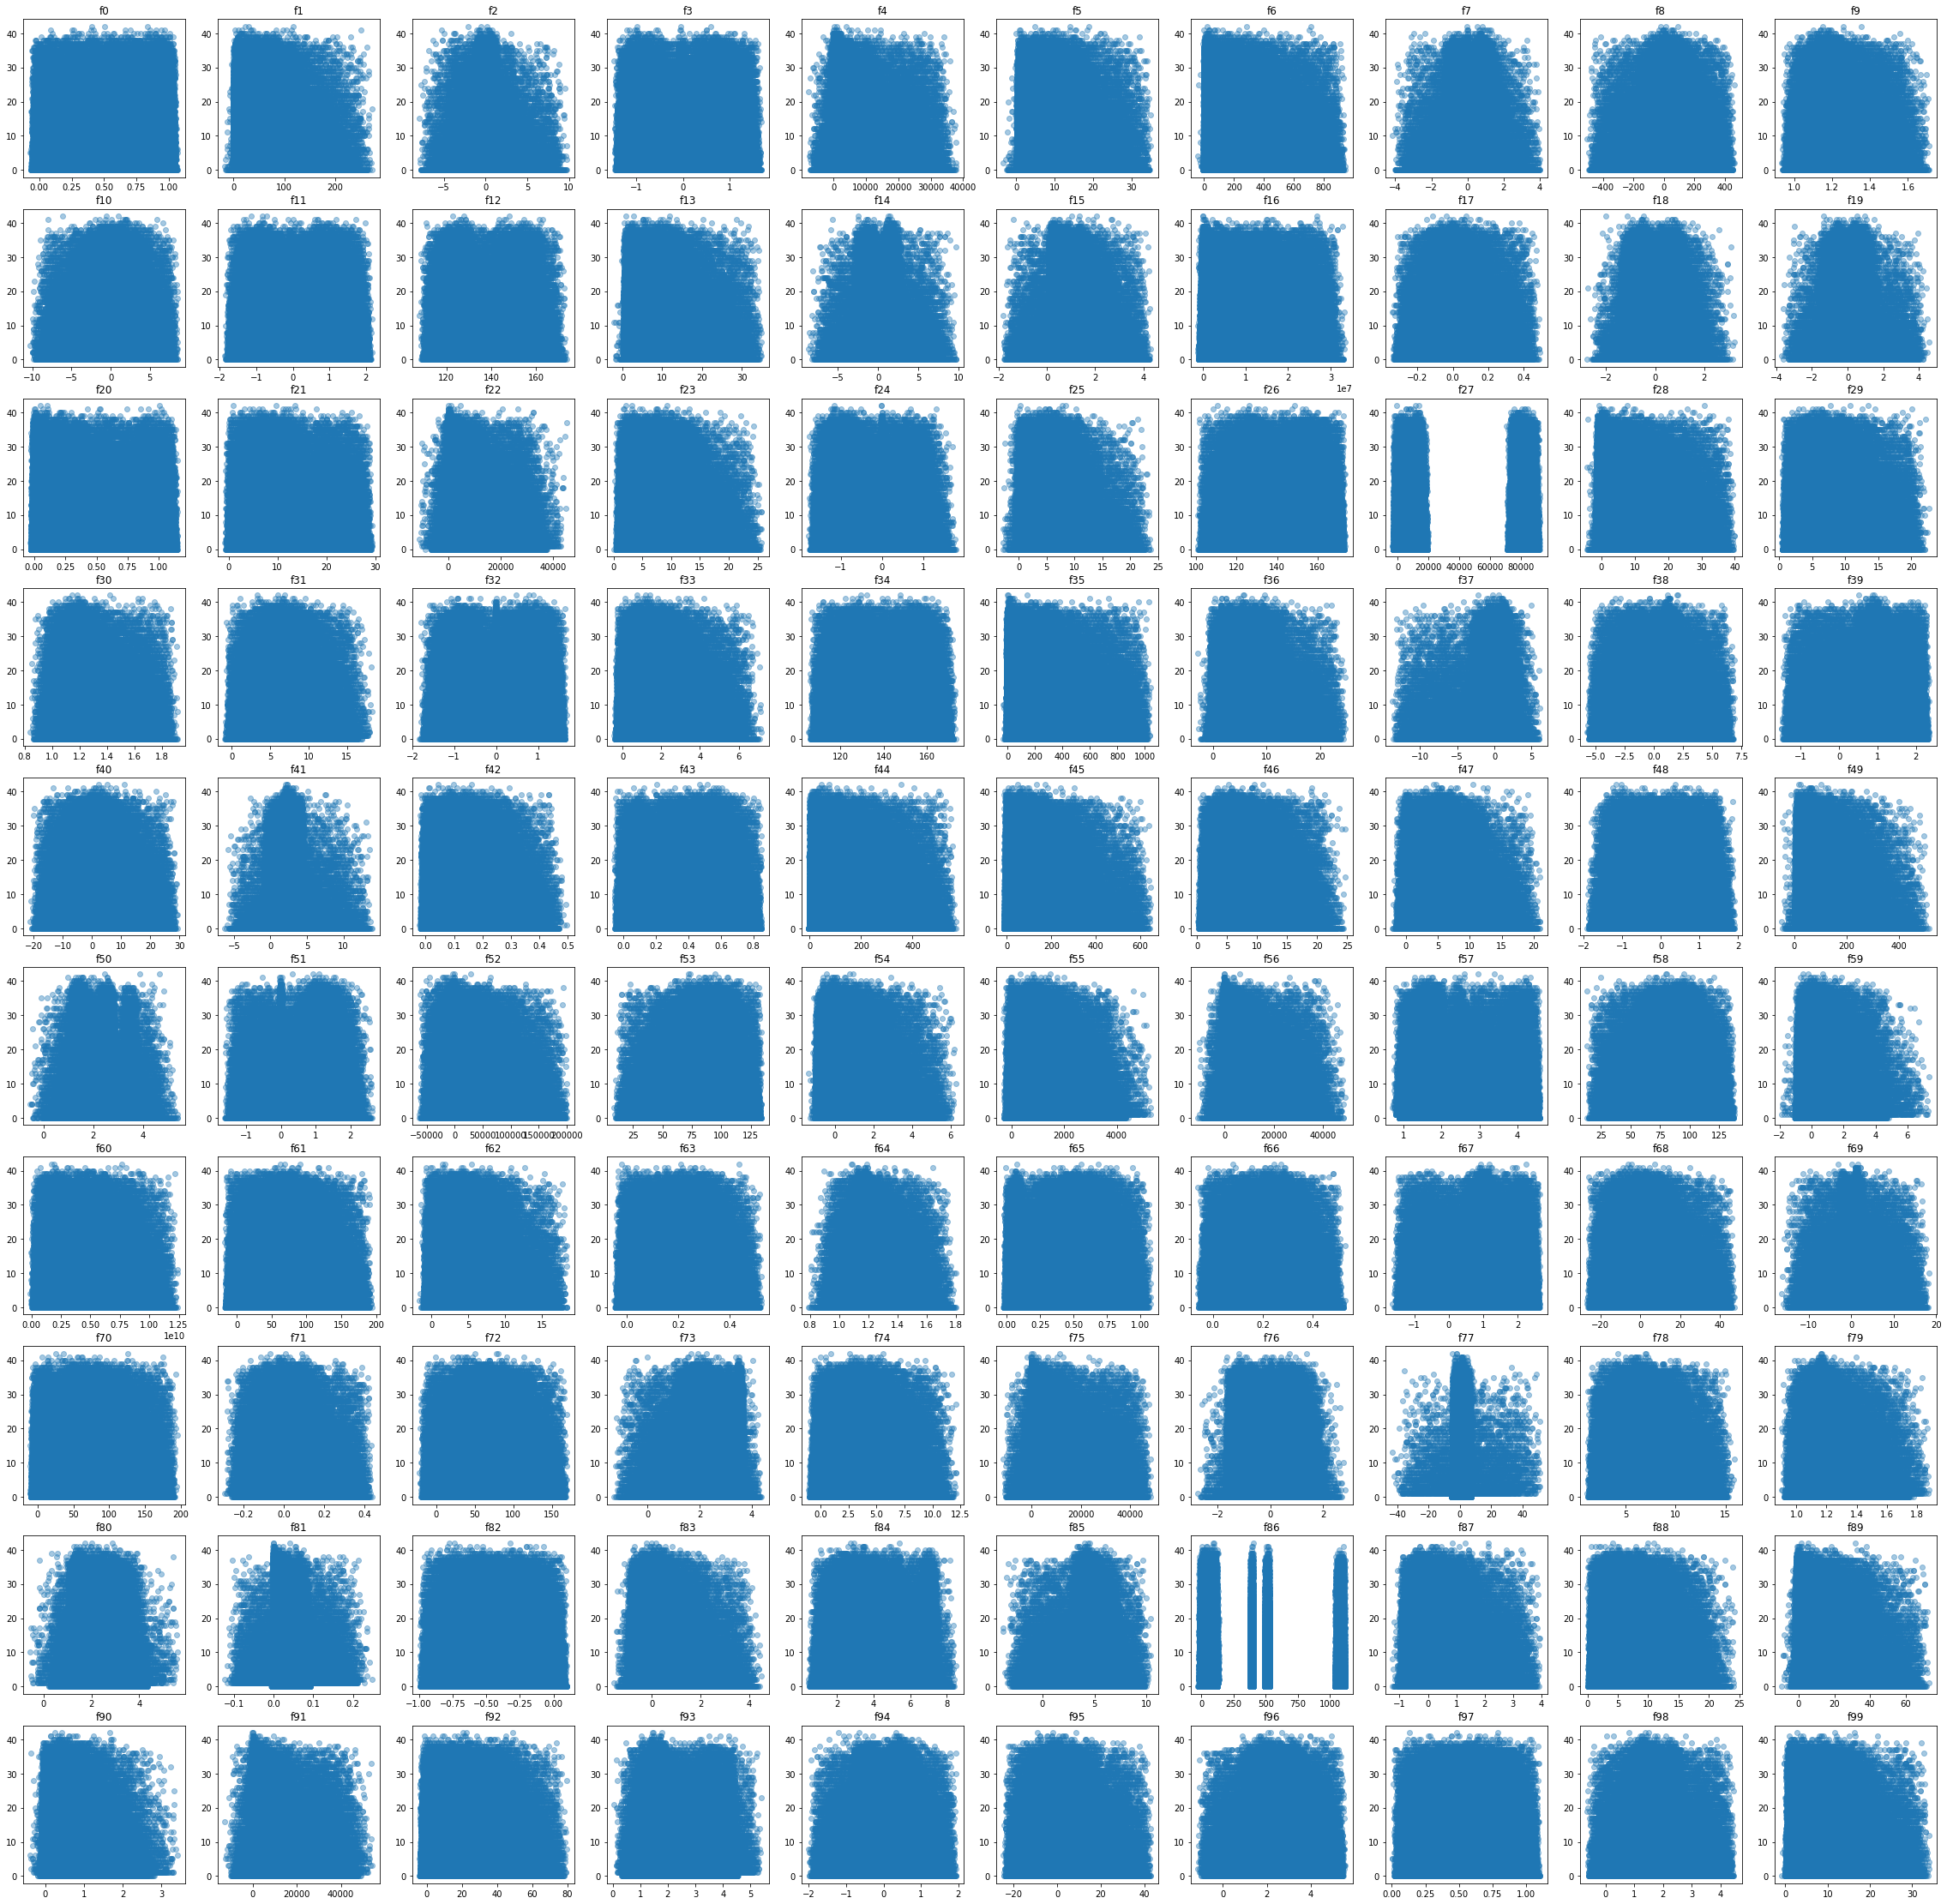

In [13]:
# scatter plots
train_columns = train_df.iloc[:, :-1].columns.tolist()
fig_columns = 10; fig_rows = 10

f, axes = plt.subplots(fig_rows, fig_columns, sharex=False, sharey=False)
f.set_size_inches((4 * fig_rows, 4 * fig_columns)) 

for i, col in enumerate(train_columns):
    axes[i // 10][i % 10].scatter(train_df[col], train_df['loss'], alpha=0.4)
    axes[i // 10][i % 10].set_title(col)
plt.show()

### Distribution of Train data features

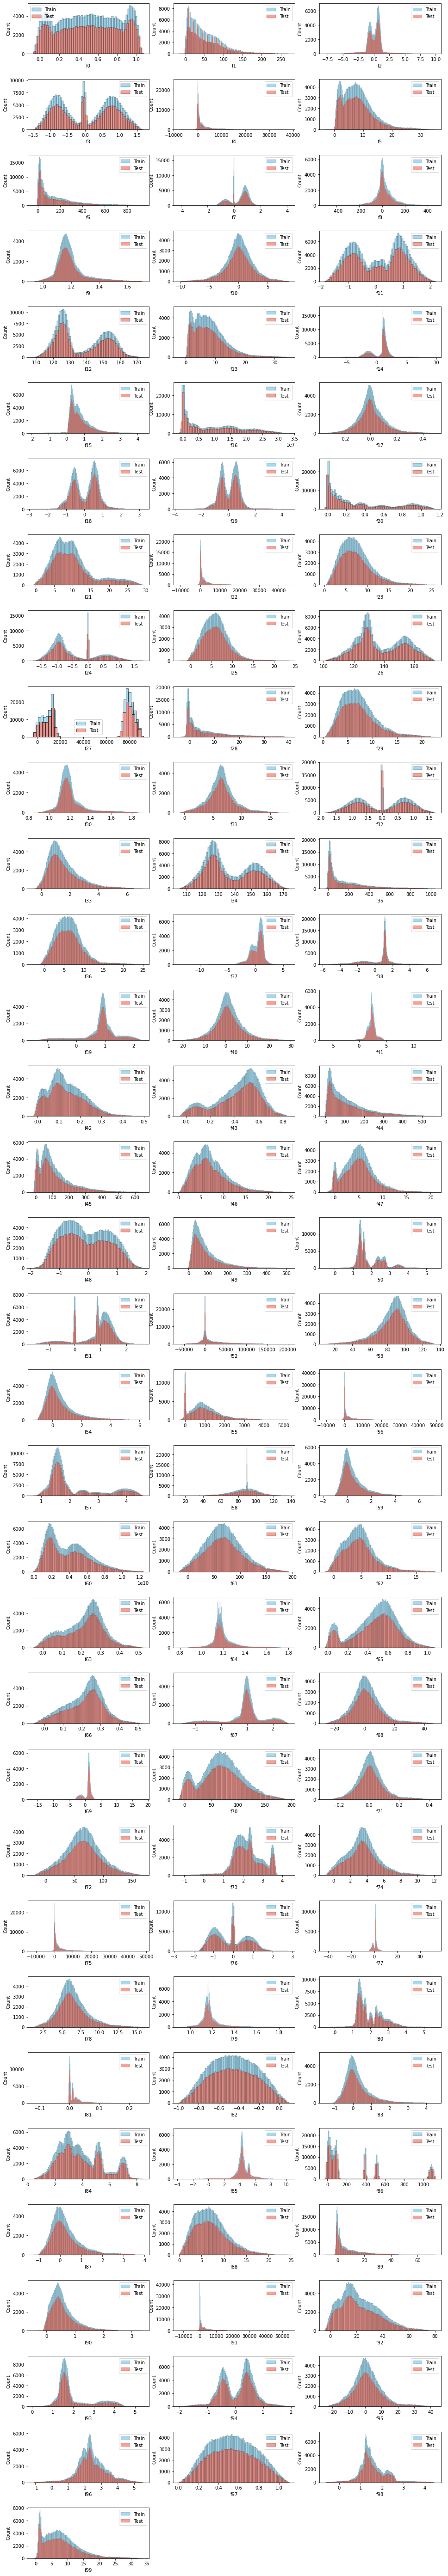

In [14]:
plt.subplots(figsize=(16,150))
length = len(train_columns)

for i, j in zip(train_columns, range(length)):
    fig = plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.histplot(x=train_df[i], color='skyblue',edgecolor='black')
    sns.histplot(x=test_df[i], color='salmon',edgecolor='black')
    fig.legend(labels=('Train','Test'))

## 3. Preprocessing

In [15]:
# split X, y

X = train_df.drop('loss', axis=1)
y = train_df['loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (225000, 100)
Shape of y_train: (225000,)


### Normalization

In [16]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### Dimension Reduction

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 4. Modeling with MLP (using Pytorch)

In [18]:
# training config
BATCH_SIZE = 64
EPOCHS = 10
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')

# custom datasets
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.to_numpy())
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.to_numpy())

train_dataset = Data.TensorDataset(X_train, y_train)
test_dataset = Data.TensorDataset(X_test, y_test)

train_loader = Data.DataLoader(
    dataset=train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

test_loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [19]:
class MLP_Regressor(nn.Module):
  def __init__(self, ):
    super(MLP_Regressor, self).__init__()
    self.fc1 = nn.Linear(12, 128)
    self.fc2 = nn.Linear(128, 256)
    self.fc3 = nn.Linear(256, 128)
    self.fc4 = nn.Linear(128, 64)
    self.fc5 = nn.Linear(64, 32)
    self.fc6 = nn.Linear(32, 1)

    self.dropout_prob = 0.5

    self.batchnorm1 = nn.BatchNorm1d(128)
    self.batchnorm2 = nn.BatchNorm1d(256)
    self.batchnorm3 = nn.BatchNorm1d(128)
    self.batchnorm4 = nn.BatchNorm1d(64)
    self.batchnorm5 = nn.BatchNorm1d(32)

  def forward(self, x):
    out = F.relu(self.batchnorm1(self.fc1(x)))
    out = F.dropout(out, training=self.training, p=self.dropout_prob)
    out = F.relu(self.batchnorm2(self.fc2(out)))
    out = F.dropout(out, training=self.training, p=self.dropout_prob)
    out = F.relu(self.batchnorm3(self.fc3(out)))
    out = F.dropout(out, training=self.training, p=self.dropout_prob)
    out = F.relu(self.batchnorm4(self.fc4(out)))
    out = F.dropout(out, training=self.training, p=self.dropout_prob)
    out = F.relu(self.batchnorm5(self.fc5(out)))
    out = F.dropout(out, training=self.training, p=self.dropout_prob)
    out = self.fc6(out)
    return out

In [20]:
def weight_init(m):
    if isinstance(m, nn.Linear):
        init.kaiming_uniform_(m.weight.data)

In [21]:
model = MLP_Regressor().to(DEVICE)
model.apply(weight_init)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

In [22]:
def train(model, train_loader, optimizer, log_interval=200):
  model.train()
  train_epoch_loss = 0.0

  for batch_idx, (feature, label) in enumerate(train_loader):
    feature = feature.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(feature)
    loss = torch.sqrt(criterion(output, label))
    loss.backward()
    optimizer.step()
    train_epoch_loss += loss.item()

    if batch_idx % log_interval == 0:
          print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(feature), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
          
  train_epoch_loss /= (len(train_loader.dataset) / BATCH_SIZE)
  return train_epoch_loss

In [23]:
def validate(model, test_loader):
  model.eval()
  valid_epoch_loss = 0.0

  with torch.no_grad():
    for feature, label in test_loader:
      feature = feature.to(DEVICE)
      label = label.to(DEVICE)
      output = model(feature)
      loss = torch.sqrt(criterion(output, label))
      valid_epoch_loss += loss.item()

  valid_epoch_loss /= (len(test_loader.dataset) / BATCH_SIZE)
  return valid_epoch_loss

In [24]:
train_loss = []
val_loss = []
for epoch in range(EPOCHS):
    print(f"Epoch {epoch+1} of {EPOCHS}")
    train_epoch_loss = train(model, train_loader, optimizer, log_interval=1000)
    val_epoch_loss = validate(model, test_loader)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}\n".format(epoch+1, val_epoch_loss))

Epoch 1 of 10
Train Epoch: 0 [0/225000 (0%)]	Train Loss: 12.368196
Train Epoch: 0 [64000/225000 (28%)]	Train Loss: 7.207875
Train Epoch: 0 [128000/225000 (57%)]	Train Loss: 8.947929
Train Epoch: 0 [192000/225000 (85%)]	Train Loss: 7.792555

[EPOCH: 1], 	Test Loss: 7.8469

Epoch 2 of 10
Train Epoch: 1 [0/225000 (0%)]	Train Loss: 9.163080
Train Epoch: 1 [64000/225000 (28%)]	Train Loss: 6.979514
Train Epoch: 1 [128000/225000 (57%)]	Train Loss: 9.210117
Train Epoch: 1 [192000/225000 (85%)]	Train Loss: 8.055738

[EPOCH: 2], 	Test Loss: 7.8206

Epoch 3 of 10
Train Epoch: 2 [0/225000 (0%)]	Train Loss: 6.597473
Train Epoch: 2 [64000/225000 (28%)]	Train Loss: 7.633977
Train Epoch: 2 [128000/225000 (57%)]	Train Loss: 8.717172
Train Epoch: 2 [192000/225000 (85%)]	Train Loss: 7.201975

[EPOCH: 3], 	Test Loss: 7.8221

Epoch 4 of 10
Train Epoch: 3 [0/225000 (0%)]	Train Loss: 10.178991
Train Epoch: 3 [64000/225000 (28%)]	Train Loss: 7.420517
Train Epoch: 3 [128000/225000 (57%)]	Train Loss: 8.222570
T

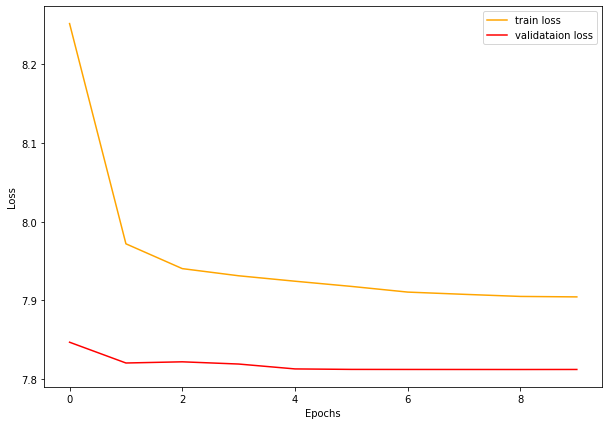

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. Submission Test data

In [26]:
# Normalization
test_data = test_df.values

test_data = std.transform(test_data)
test_data = pca.transform(test_data)
test_data = torch.Tensor(test_data).to(DEVICE)

In [27]:
test_data

tensor([[-1.6638,  0.2694,  0.2298,  ..., -0.3440, -0.4475,  0.7655],
        [ 1.0807, -0.4903,  2.7981,  ...,  0.0240,  0.2295, -0.2375],
        [-0.4767, -0.8785, -0.1763,  ..., -0.3326, -1.3061,  1.1156],
        ...,
        [-1.7017, -0.6279,  0.5976,  ..., -0.0471,  0.6709,  0.7764],
        [-1.5816,  0.5813,  1.1672,  ..., -1.1765,  2.8812,  0.8504],
        [ 1.0841,  1.0322,  2.1153,  ...,  1.1222, -0.6791, -0.6210]],
       device='cuda:0')

In [29]:
sample_submission = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')

with torch.no_grad():
  prediction = model(test_data)

sample_submission['loss'] = prediction.cpu().numpy()
sample_submission.to_csv("submission.csv",index=False)